#####Tải dữ liệu và unzip

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! gdown --id 1--nMYP81el6T_HYV9-GOocxwh-Q8yMyc

In [ ]:
pip install -U --no-cache-dir gdown --pre

In [ ]:
! gdown --id 1HwN-9U1CbbApGnqFX3mMXpcghzBGlrt6

In [ ]:
!unzip /content/'take and remove.zip' -d /content/

#####Khai báo thư viện

In [1]:
import tensorflow as tf
import random
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#####Xây dựng model

In [2]:
preprocess_input = tf.keras.applications.densenet.preprocess_input
IMG_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.DenseNet121(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
# --------------------
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, 'sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

29084464/29084464 [==============================] - 0s 0us/step


#####FINE TUNING

In [8]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [9]:
base_model.layers[418].name

'conv5_block16_0_bn'

In [10]:
# 313
base_model.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 418
print('Number of classes that can be trained: ', len(base_model.layers)-fine_tune_at)
# Freeze all the layers before the `fine_tune_at` layer
for i in range(len(base_model.layers)):
  if i < fine_tune_at:
    base_model.layers[i].trainable = False
    continue
  print(base_model.layers[i].name)

Number of classes that can be trained:  9
conv5_block16_0_bn
conv5_block16_0_relu
conv5_block16_1_conv
conv5_block16_1_bn
conv5_block16_1_relu
conv5_block16_2_conv
conv5_block16_concat
bn
relu


#####Load data

In [ ]:
train_take_path = '/content/take and remove/train/take/'
train_remove_path = '/content/take and remove/train/remove/'
test_take_path = '/content/take and remove/test/take/'
test_remove_path = '/content/take and remove/test/remove/'

train_take_list = os.listdir(train_take_path)
train_remove_list = os.listdir(train_remove_path)
test_take_list = os.listdir(test_take_path)
test_remove_list = os.listdir(test_remove_path)

# print(len(train_take_list))
# print(len(train_remove_list))
# print(len(test_take_list))
# print(len(test_remove_list))

X_train = []
y_train = []
for i in train_take_list:
  image = cv2.imread(train_take_path+i)
  image = tf.keras.utils.img_to_array(image)
  X_train.append(image)
  y_train.append(1)
for i in train_remove_list:
  image = cv2.imread(train_remove_path+i)
  image = tf.keras.utils.img_to_array(image)
  X_train.append(image)
  y_train.append(0)
X_train = np.array(X_train, dtype="float32") / 255.0
y_train = np.array(y_train)
y_train = y_train.reshape((1184,1))

X_test = []
y_test = []
for i in test_take_list:
  image = cv2.imread(test_take_path+i)
  image = tf.keras.utils.img_to_array(image)
  X_test.append(image)
  y_test.append(1)
for i in test_remove_list:
  image = cv2.imread(test_remove_path+i)
  image = tf.keras.utils.img_to_array(image)
  X_test.append(image)
  y_test.append(0)
X_test = np.array(X_test, dtype="float32") / 255.0
y_test = np.array(y_test)
y_test = y_test.reshape((296,1))

#####Traning

In [11]:
model.load_weights('/content/weights1.h5')

In [ ]:
learning_rate=1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.MeanAbsoluteError())

In [ ]:
epochs = 20
reduce = False
odd = True
while(1):
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

  if odd:
    model.save_weights('/content/weights1.h5')
  else:
    model.save_weights('/content/weights0.h5')
  odd = not odd
  
  x = np.min(history.history['val_loss'])
  if x > min:
    if reduce:
      break
    reduce = True
    learning_rate = learning_rate/2
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.MeanAbsoluteError())
    continue

  min = x
  print(min)
  print(learning_rate)
  reduce = False

loss:  0.03423309326171875
val_loss:  0.16037175059318542


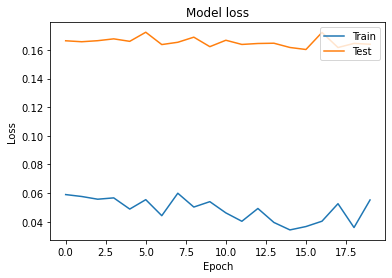

In [ ]:
print("loss: ", np.min(history.history['loss']))
print("val_loss: ", np.min(history.history['val_loss']))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/Project Data Science/data/using_images/weight.h5')

####Áp dụng để làm sạch

In [12]:
! gdown --id 19s4JE50xhJ9Xggz4TYv9BC7n_EtrICLZ

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19s4JE50xhJ9Xggz4TYv9BC7n_EtrICLZ
To: /content/cropped_images.zip
100% 428M/428M [00:03<00:00, 136MB/s]


In [ ]:
!unzip /content/cropped_images.zip -d /content/cropped_images

In [ ]:
path = '/content/cropped_images/images/'

List = os.listdir(path)

result = []
for i in range(int(len(List)/197)):
  print(i)
  x=[]
  for j in range(i*197,i*197+197):
    image = cv2.imread(path+List[j])
    image = tf.keras.utils.img_to_array(image)
    x.append(image)
  x = np.array(x, dtype="float32") / 255.0
  for j in model(x):
    result.append(float(j))

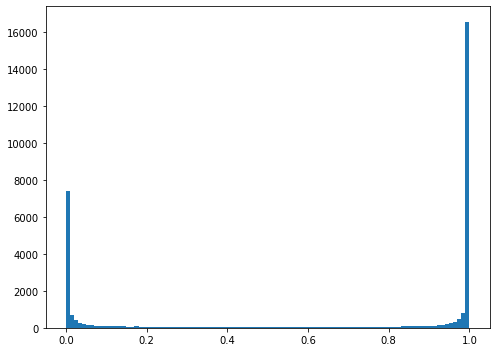

In [16]:
fig, axs = plt.subplots(1, 1,figsize =(7, 5),tight_layout = True)
axs.hist(result, bins = 100)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
count=0
for i in range(len(result)):
  if (0.7 < result[i]) and (result[i] < 0.8):
    image = mpimg.imread(path+List[i])
    plt.imshow(image)
    plt.show()
    count+=1
    if count == 50:
      break

In [17]:
for i in range(len(List)):
    if result[i] < 0.5:
      os.remove(path + List[i])

In [20]:
print(len(List))
print(len(os.listdir(path)))

33096
21380


In [22]:
import shutil
shutil.make_archive('/content/clean_images', 'zip', '/content/cropped_images')

'/content/clean_images.zip'

In [24]:
!cp /content/clean_images.zip /content/drive/MyDrive/'Project Data Science'/data